In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/NLP G/commentary.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Match_id,Team,Over_num,Commentary,batsman,score
0,4281444,RCB 1st Inns,0.5,"Nehra to Mandeep, FOUR, first boundary for Man...",Nehra to Mandeep,FOUR
1,4281444,RCB 1st Inns,1.0,"Nehra to Mandeep, FOUR, back-to-back boundarie...",Nehra to Mandeep,FOUR
2,4281444,RCB 1st Inns,10.0,"Henriques to Kedar Jadhav, FOUR, hit straight ...",Henriques to Kedar Jadhav,FOUR
3,4281444,RCB 1st Inns,10.4,"Nehra to Kedar Jadhav, FOUR, another full toss...",Nehra to Kedar Jadhav,FOUR
4,4281444,RCB 1st Inns,10.5,"Nehra to Kedar Jadhav, FOUR, four more. Jadhav...",Nehra to Kedar Jadhav,FOUR


# 2- Clean and preprocess the data
 # Tokenization and Lemmatization




In [ ]:
 #Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

#Assign the first column of a pandas DataFrame called 'df' to 'text'
text = df.iloc[:,3].tolist()  # convert to list

#Tokenize each document in the 'text' list using SpaCy's 'nlp.pipe' method
tokens = []
for doc in nlp.pipe(text):
    tokens += [token.text for token in doc]


In [ ]:
 #Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')
#Assign the first column of a pandas DataFrame called 'df' to 'text'
text = df.iloc[:,3].tolist()  # convert to list

#Using the SpaCy 'nlp.pipe' method, iterate over each document in the 'text' list and lemmatize it
lemmas = []
for doc in nlp.pipe(text):
    lemmas += [token.lemma_ for token in doc]


Removing non-alphabetic characters and stopwords

In [ ]:
#Create a new list 'a_lemmas' that contains only alphabetic lemmas that are not contained in the 'stopwords' list
stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)

#Add "I" to the list of "stopwords"
stopwords.extend([""])
#remove stopwords from a list of lemmatized tokens.
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]

Wordcloud

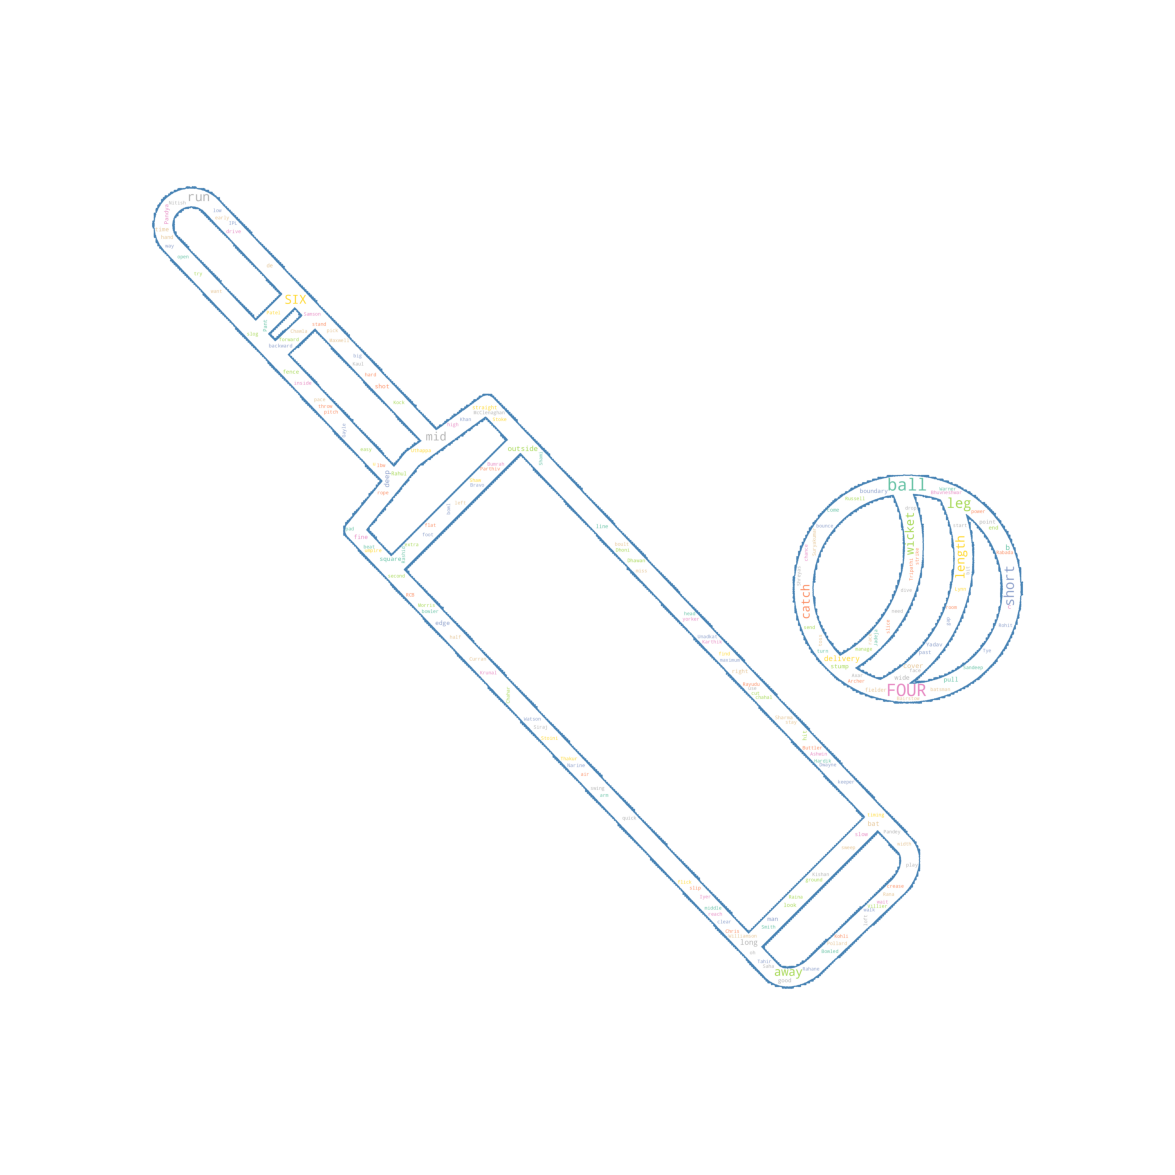

In [ ]:
from PIL import Image

# Create a string from the list of lemmas
text = ' '.join(a_lemmas)

# Load the image as a numpy array
image = np.array(Image.open('/content/drive/MyDrive/NLP G/mask4.jpg'))

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white'
, colormap='Set2', collocations=False, mask=image,contour_width=6, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

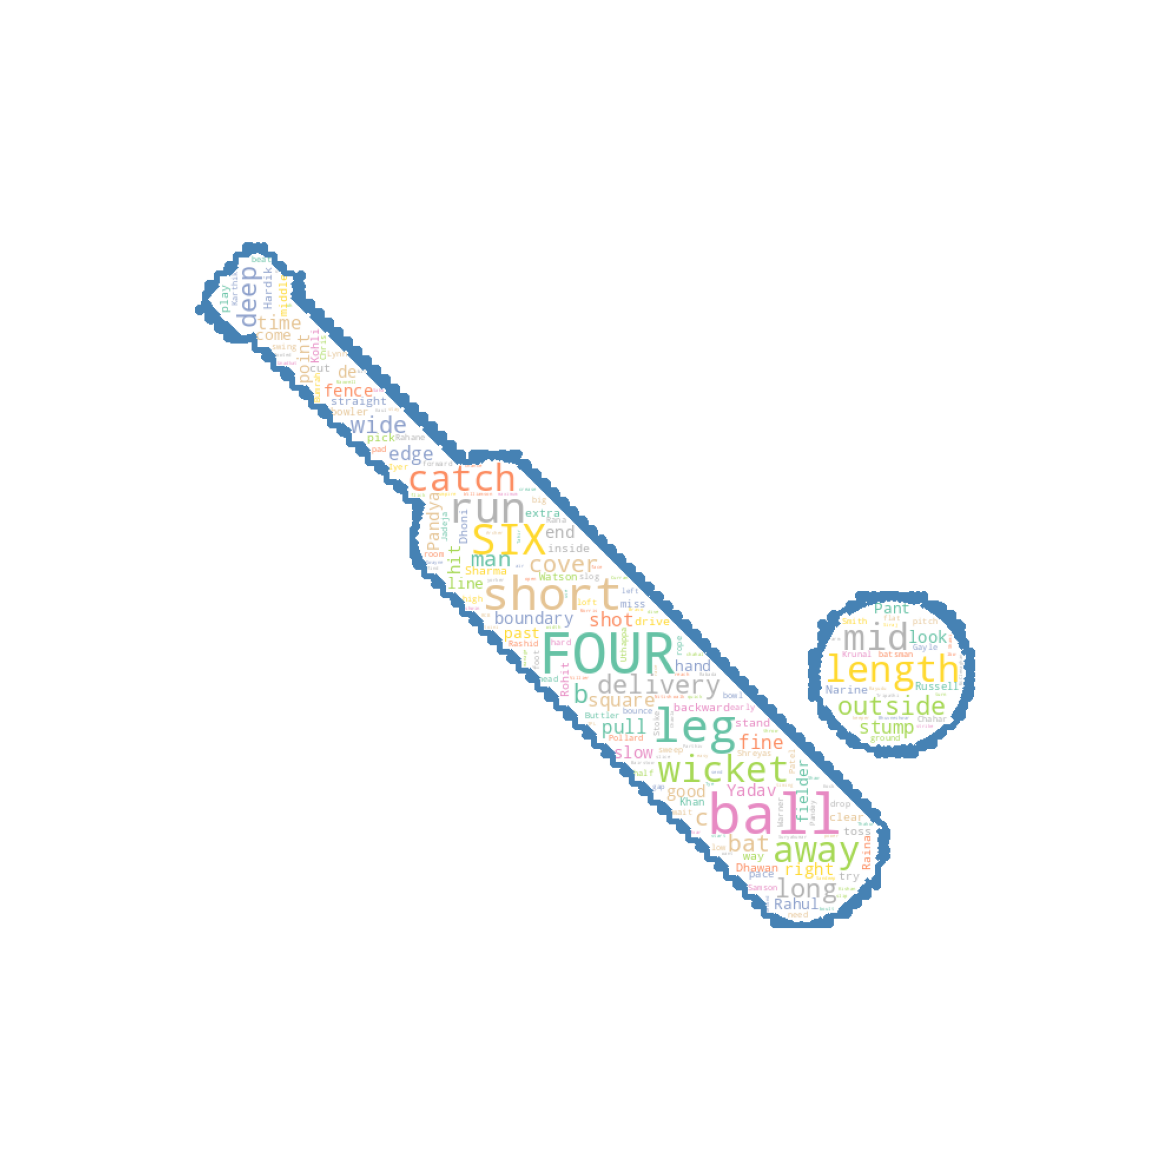

In [ ]:

# Create a string from the list of lemmas
text = ' '.join(a_lemmas)

# Load the image as a numpy array
image = np.array(Image.open('/content/drive/MyDrive/NLP G/mask9.jpg'))

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white'
, colormap='Set2', collocations=False, mask=image,contour_width=6, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')
#import SentimentIntensityAnalyzer from the nltk library
sid = SentimentIntensityAnalyzer()

#apply the polarity scores to each text in the training dataset
df['sentiments'] = df["Commentary"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))

#Number of Words
df['Number_Of_Words'] = df['Commentary'].apply(lambda x:len(x.split(' ')))
#Average Word Length
df['Mean_Word_Length'] = df['Commentary'].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
df.head()

#Take the positive, neutral, and negative sentiment scores from the polarity scores and add a small value to avoid zero division
df['Positive Sentiment'] = df['sentiments'].apply(lambda x: x['pos']+1*(10**-6))
df['Neutral Sentiment'] = df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
df['Negative Sentiment'] = df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))


df.sample(10) #Print a random sample of 10 rows 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Match_id,Team,Over_num,Commentary,batsman,score,sentiments,Number_Of_Words,Mean_Word_Length,Positive Sentiment,Neutral Sentiment,Negative Sentiment
11384,3130666,RR 1st Inns,8.5,"Rahul Chahar to Tom Curran, 1 run, sliding in ...",Rahul Chahar to Tom Curran,ONE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",17,4.41,0.000001,1.000001,0.000001
11344,3130666,MI 1st Inns,2.5,"Rajpoot to de Kock, FOUR, cheeky and four, cha...",Rajpoot to de Kock,FOUR,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",40,4.68,0.101001,0.899001,0.000001
8708,5962210,SRH 1st Inns,16.5,"Karn Sharma to Bairstow, SIX, oh well Bairstow...",Karn Sharma to Bairstow,SIX,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",42,4.05,0.127001,0.873001,0.000001
1033,9296666,KXIP 1st Inns,13.0,"Nabi to Vohra, FOUR, almost an action replay o...",Nabi to Vohra,FOUR,"{'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'comp...",37,4.22,0.049001,0.951001,0.000001
5937,9958794,DC 1st Inns,9.3,"de Grandhomme to Pant, 1 run, slapped back. Wo...",de Grandhomme to Pant,ONE,"{'neg': 0.058, 'neu': 0.748, 'pos': 0.194, 'co...",32,4.47,0.194001,0.748001,0.058001
2516,4967787,RCB 1st Inns,12.0,"Rajpoot to Head, FOUR, that ruins the over for...",Rajpoot to Head,FOUR,"{'neg': 0.122, 'neu': 0.801, 'pos': 0.077, 'co...",50,4.06,0.077001,0.801001,0.122001
10474,3533313,RR 1st Inns,15.2,"Ngidi to Smith, FOUR, cheeky and four, Smith a...",Ngidi to Smith,FOUR,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",49,4.08,0.122001,0.878001,0.000001
10762,3434824,RCB 1st Inns,13.5,"Pattinson to Devdutt Padikkal, SIX, now the fu...",Pattinson to Devdutt Padikkal,SIX,"{'neg': 0.073, 'neu': 0.8, 'pos': 0.127, 'comp...",48,4.73,0.127001,0.800001,0.073001
6506,8897809,DC 1st Inns,4.3,"Bumrah to Maxwell, out Bowled!! That's quick s...",Bumrah to Maxwell,OUT,"{'neg': 0.132, 'neu': 0.84, 'pos': 0.029, 'com...",72,5.00,0.029001,0.840001,0.132001
10156,9969874,CSK 1st Inns,4.3,"Axar to du Plessis, SIX, yet again its that pr...",Axar to du Plessis,SIX,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",41,4.29,0.075001,0.925001,0.000001


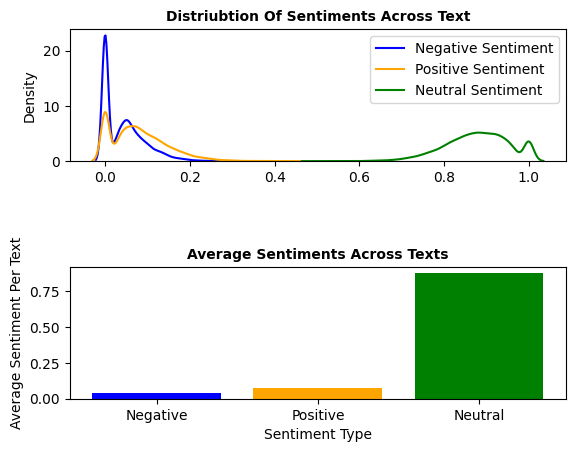

In [ ]:
#Use kernel density estimation to plot the distribution of sentiment scores
plt.subplot(2,1,1) #Use subplot to show 2 plots together
plt.title('Distriubtion Of Sentiments Across Text',fontsize=10,fontweight='bold')
sns.kdeplot(df['Negative Sentiment'], color = 'blue')
sns.kdeplot(df['Positive Sentiment'], color = 'orange')
sns.kdeplot(df['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])


#For each sentiment type, plot the average sentiment score
plt.subplot(2,1,2) #Use subplot to show 2 plots together
plt.title('Average Sentiments Across Texts',fontsize=10,fontweight='bold')
neg_total_avg = (df['Negative Sentiment'].sum())/len(df.index)
pos_total_avg = (df['Positive Sentiment'].sum())/len(df.index)
neu_total_avg = (df['Neutral Sentiment'].sum())/len(df.index)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]

plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per Text',fontsize=10)
plt.xlabel('Sentiment Type',fontsize=10)

plt.subplots_adjust(hspace=0.8)
plt.show()

# Part of Speech (POS)




In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-12 03:33:20.954427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
from collections import defaultdict
import pandas as pd

# load the en_core_web_md model
nlp = spacy.load('en_core_web_md')

# convert the Series to a list
lemmas = df["Commentary"].tolist()

# define a default dict object for storing parts of speech according to their labels
pos = defaultdict(list)

# using a loop, extract parts of speech by label from each document
for doc in nlp.pipe(lemmas):
    for token in doc:
        pos[token.pos_].append(token.text)

# create a pandas DataFrame
df_pos = pd.DataFrame(pos.items(), columns=["Label", "POS"])

# display the DataFrame as a table
display(df_pos)


,Label,POS
0,PROPN,"[Nehra, Mandeep, FOUR, Mandeep, RCB, Mandeep, ..."
1,ADP,"[to, for, on, up, over, of, into, to, to, in, ..."
2,PUNCT,"[,, ,, ., ,, ,, ,, ,, ,, -, -, ., ,, ,, ,, ,, ..."
3,ADJ,"[first, Full, first, short, third, late, more,..."
4,NOUN,"[boundary, pads, mid, -, wicket, couple, bounc..."
5,CCONJ,"[and, and, and, and, and, and, and, and, and, ..."
6,DET,"[the, the, the, a, the, the, the, the, another..."
7,VERB,"[needed, put, did, picked, dispatched, end, ha..."
8,PART,"[to, to, to, n't, to, to, to, Not, to, to, to,..."
9,AUX,"[be, is, did, was, 's, 's, 's, is, is, has, 's..."


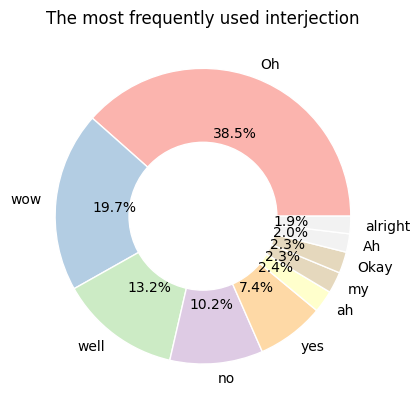

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Define the list
word_list = df_pos.iloc[12, 1]

# Count the frequencies of each word in the list
word_freq = Counter(word_list)

# Sum up the frequencies of 'Wow' and 'wow'
wow_freq = 0
for key in ['Wow' , 'wow']:
    if key in word_freq:
        wow_freq += word_freq[key]

# Sum up the frequencies of 'oh' and 'Oh'
oh_freq = 0
for key in ['oh' , 'Oh']:
    if key in word_freq:
        oh_freq += word_freq[key]

# Sum up the frequencies of 'well' and 'Well'
well_freq = 0
for key in ['well', 'Well']:
    if key in word_freq:
        well_freq += word_freq[key]

# Sum up the frequencies of 'No' and 'no'
no_freq = 0
for key in ['No' , 'no']:
    if key in word_freq:
        no_freq += word_freq[key]  

# Sum up the frequencies of 'Yes' and 'yes'
yes_freq = 0
for key in ['Yes' , 'yes']:
    if key in word_freq:
        yes_freq += word_freq[key]             

# Create a new dictionary with the summed up frequency for 'oh', 'Oh', 'well', and 'Well'
new_word_freq = {'Oh': oh_freq, 'well': well_freq , 'wow':wow_freq, 'no':no_freq , 'yes':yes_freq}
for key in word_freq:
    if key not in ['oh', 'Oh', 'well', 'Well','wow','Wow','No','no','Yes','yes']:
        new_word_freq[key] = word_freq[key]

# Get the 5 most common words
top_words = dict(Counter(new_word_freq).most_common(10))

# Define a colormap
cmap = plt.get_cmap('Pastel1')

# Define the values and labels for the chart
values = list(top_words.values())
labels = list(top_words.keys())

# Define the inner circle properties
inner_circle = plt.Circle((0,0),0.5,color='white')

# Create the chart with the doughnut effect
plt.pie(values, labels=labels, wedgeprops={'width': 0.8, 'edgecolor': 'w'}, colors=cmap(np.linspace(0, 1, len(values))), autopct='%1.1f%%')
plt.gca().add_artist(inner_circle)

# Set the chart title
plt.title('The most frequently used interjection')

# Show the chart
plt.show()


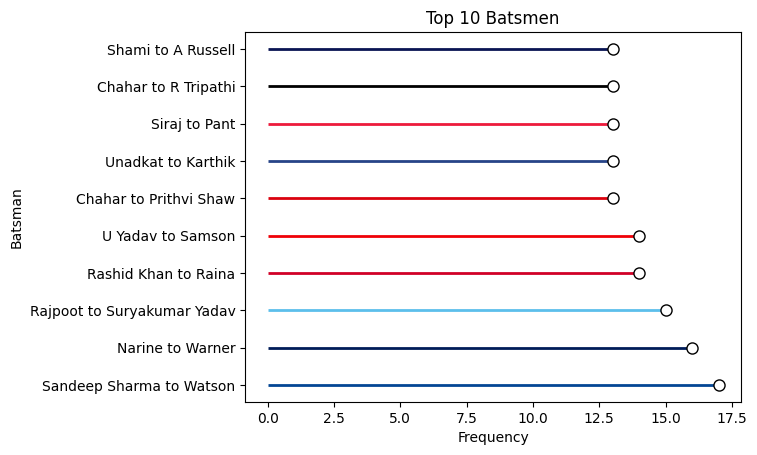

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each batsman and keep the top 10
top_batsmen = df['batsman'].value_counts().nlargest(10)

# Create a horizontal lollipop chart with different colors for each bar
plt.hlines(y=top_batsmen.index, xmin=0, xmax=top_batsmen.values, 
           colors=['#034694', '#001C58', '#5CBFEB', '#D00027', '#EF0107', '#DA020E', '#274488', '#ED1A3B', '#000000', '#091453'], linewidth=2)
plt.plot(top_batsmen.values, top_batsmen.index, "o", markersize=8, color='white', markeredgecolor='black', markeredgewidth=1)

# Set the chart title and axis labels
plt.title('Top 10 Batsmen')
plt.xlabel('Frequency')
plt.ylabel('Batsman')

# Show the chart
plt.show()


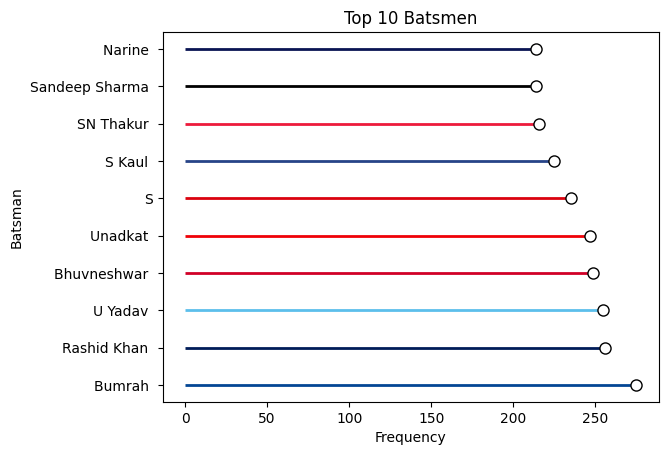

In [ ]:
import matplotlib.pyplot as plt

# Split the names at 'to' and take the first name
df['batsmans'] = df['batsman'].str.split('to', expand=True)[0]

# Count the frequency of each batsman and keep the top 10
top_batsmen = df['batsmans'].value_counts().nlargest(10)

# Create a horizontal lollipop chart with different colors for each bar
plt.hlines(y=top_batsmen.index, xmin=0, xmax=top_batsmen.values, 
           colors=['#034694', '#001C58', '#5CBFEB', '#D00027', '#EF0107', '#DA020E', '#274488', '#ED1A3B', '#000000', '#091453'], linewidth=2)
plt.plot(top_batsmen.values, top_batsmen.index, "o", markersize=8, color='white', markeredgecolor='black', markeredgewidth=1)

# Set the chart title and axis labels
plt.title('Top 10 Batsmen')
plt.xlabel('Frequency')
plt.ylabel('Batsman')

# Show the chart
plt.show()


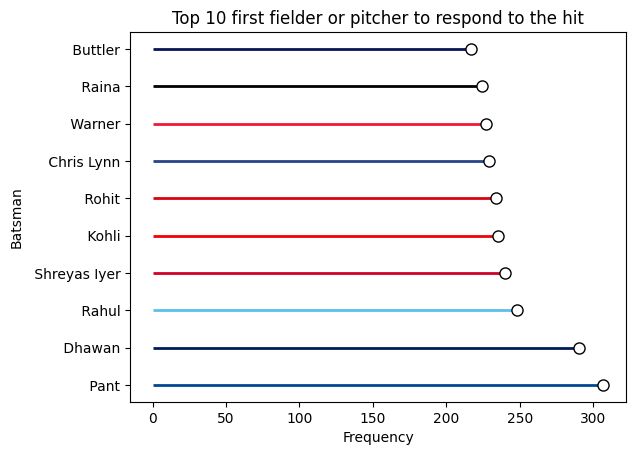

In [ ]:
import matplotlib.pyplot as plt

# Split the names at 'to' and take the second name
df['fielder'] = df['batsman'].str.split('to', expand=True)[1]

# Count the frequency of each each first fielder or pitcher to respond to the hit and keep the top 10
top_batsmen = df['fielder'].value_counts().nlargest(10)

# Create a horizontal lollipop chart with different colors for each bar
plt.hlines(y=top_batsmen.index, xmin=0, xmax=top_batsmen.values, 
           colors=['#034694', '#001C58', '#5CBFEB', '#D00027', '#EF0107', '#DA020E', '#274488', '#ED1A3B', '#000000', '#091453'], linewidth=2)
plt.plot(top_batsmen.values, top_batsmen.index, "o", markersize=8, color='white', markeredgecolor='black', markeredgewidth=1)

# Set the chart title and axis labels
plt.title('Top 10 first fielder or pitcher to respond to the hit')
plt.xlabel('Frequency')
plt.ylabel('Batsman')

# Show the chart
plt.show()


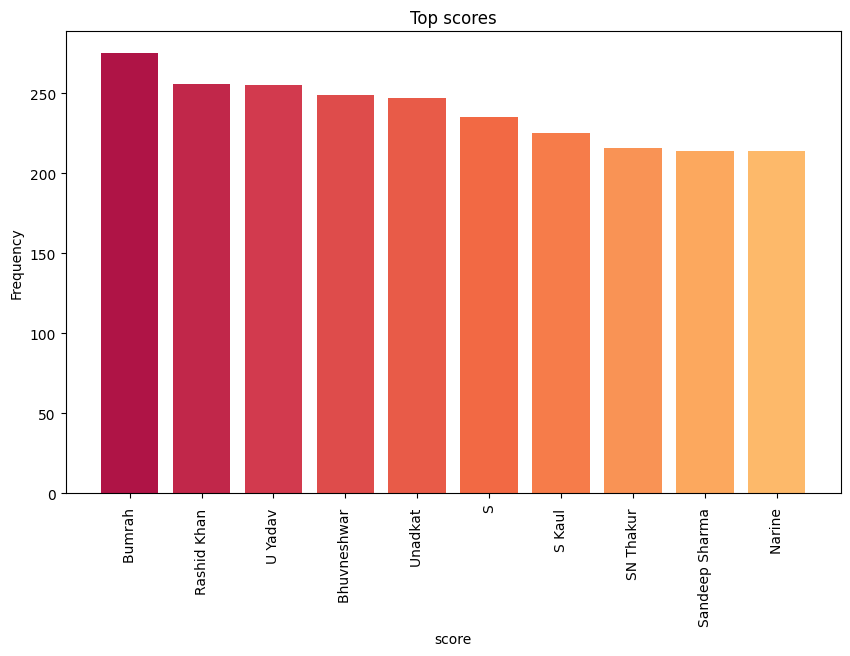

In [ ]:
# Count the frequency of each batsman and keep the top 30
score = df['score'].value_counts().nlargest(30)

# Define a color palette with 5 colors
colors = sns.color_palette('Spectral', n_colors=30)

# Create a bar chart of the top scores
plt.figure(figsize=(10,6)) # Set the figure size
plt.bar(top_batsmen.index, top_batsmen.values, color=colors) # Set the color to the palette
plt.xticks(rotation=90) # Rotate the x-axis labels for better visibility
plt.title('Top scores') # Set the title
plt.xlabel('score') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.show()